In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
train = pd.read_csv("Train (2).csv")
test = pd.read_csv("Test (2).csv")

In [131]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [132]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [133]:
print("shape for train data: ", train.shape)
print("shape for test data: ", test.shape)

shape for train data:  (23524, 13)
shape for test data:  (10086, 12)


In [134]:
print("Train data dtypes: ", train.dtypes)
print("Test data dtypes: ", test.dtypes)

Train data dtypes:  country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object
Test data dtypes:  country                   object
year                       int64
uniqueid                  object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object


In [135]:
print("Train data nulls: ", train.isna().sum())
print("Test data nulls: ", test.isna().sum())

Train data nulls:  country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64
Test data nulls:  country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [136]:
print("Train data duplicates: ", train.duplicated().sum())
print("Test data duplicates: ", test.duplicated().sum())

Train data duplicates:  0
Test data duplicates:  0


Distribution of bank_balance

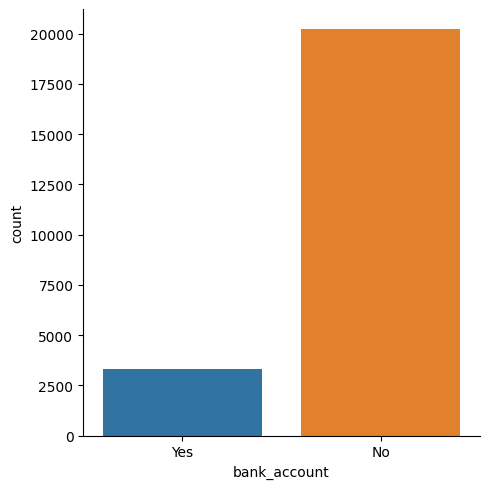

In [137]:
sns.catplot(x="bank_account", kind="count", data=train)

In [138]:
# ##function to change bank to int
def bank(df):
  if df=='Yes':
    return 1
  else:
     return 0

In [139]:
train['bank_account']=train['bank_account'].apply(bank)

In [140]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['country', 'location_type', 'cellphone_access', 'gender_of_respondent',
                       'relationship_with_head', 'marital_status', 'education_level', 'job_type', 'uniqueid']



# Create the LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each column in the list and encode the values
for col in categorical_columns:
    train[col] = label_encoder.fit_transform(train[col])

# Display the updated DataFrame
train.head()



,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,0,1,0,1,3,24,0,5,2,3,9
1,0,2018,1111,0,0,0,5,70,0,1,4,0,4
2,0,2018,2222,1,1,1,5,26,1,3,3,5,9
3,0,2018,3333,0,0,1,5,34,0,1,2,2,3
4,0,2018,4444,0,1,0,8,26,1,0,3,2,5


In [141]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['country', 'location_type', 'cellphone_access', 'gender_of_respondent',
                       'relationship_with_head', 'marital_status', 'education_level', 'job_type', 'uniqueid']



# Create the LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each column in the list and encode the values
for col in categorical_columns:
    test[col] = label_encoder.fit_transform(test[col])

# Display the updated DataFrame
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,3382,1,1,3,30,1,1,2,3,2
1,0,2018,3383,1,1,7,51,1,1,2,5,3
2,0,2018,3384,0,0,3,77,0,4,2,0,8
3,0,2018,3385,0,0,6,39,0,1,2,2,8
4,0,2018,3386,1,0,3,16,1,0,3,3,8


<Axes: >

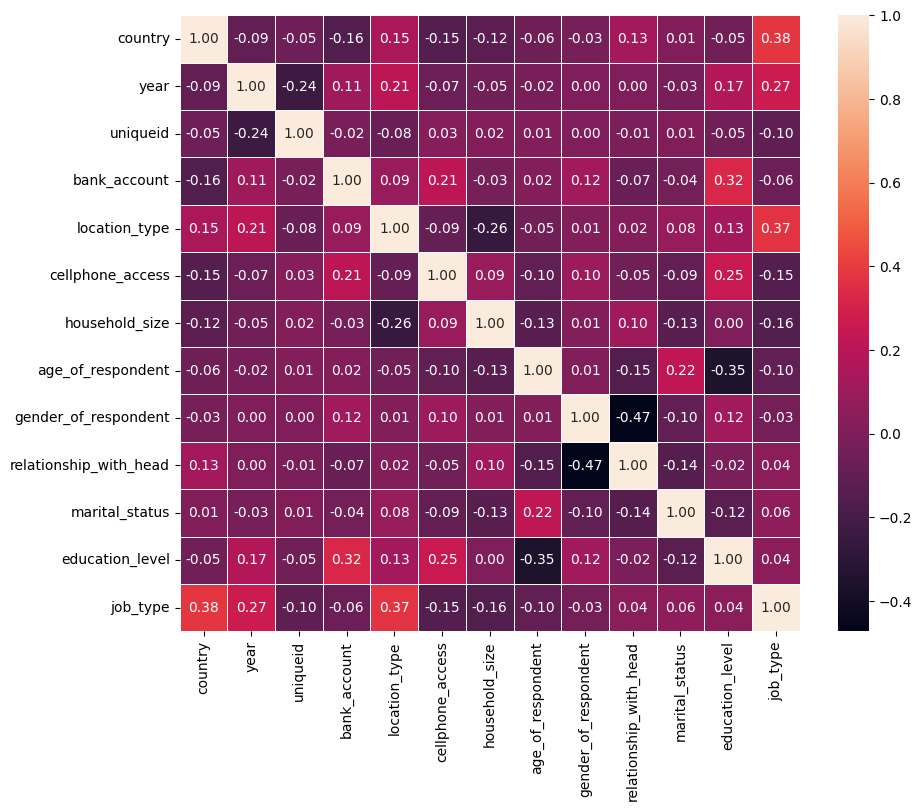

In [142]:
correlation_matrix = train.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as per your preference
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)

In [143]:
# from keras.models import Sequential
# from keras.layers import Dense

# # Define the model architecture
# model = Sequential()
# model.add(Dense(64, input_dim=len(train.columns) - 1, activation='relu'))  # Adjust input_dim as per your data
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))  # Binary classification, so sigmoid activation

# # Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [144]:
X_train = train.drop(columns=['bank_account','uniqueid'])
y_train = train['bank_account']

In [145]:
from imblearn.combine import SMOTEENN

# Create a SMOTE-ENN resampler
smote_enn = SMOTEENN(sampling_strategy='auto')

# Fit and transform your data
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)


In [146]:
from keras.models import Sequential
from keras.layers import Dense

# Assuming your input data has, for example, 10 features
input_dim = 11

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=input_dim, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [147]:


# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=64)  # Adjust epochs and batch_size as needed


Epoch 1/30
368/368 [==============================] - 2s 2ms/step - loss: 4.4763 - accuracy: 0.8002
Epoch 2/30
368/368 [==============================] - 1s 2ms/step - loss: 0.5441 - accuracy: 0.8179
Epoch 3/30
368/368 [==============================] - 1s 2ms/step - loss: 0.5328 - accuracy: 0.8261
Epoch 4/30
368/368 [==============================] - 1s 2ms/step - loss: 0.4348 - accuracy: 0.8408
Epoch 5/30
368/368 [==============================] - 1s 2ms/step - loss: 0.4629 - accuracy: 0.8362
Epoch 6/30
368/368 [==============================] - 1s 2ms/step - loss: 0.5521 - accuracy: 0.8311
Epoch 7/30
368/368 [==============================] - 1s 2ms/step - loss: 0.4868 - accuracy: 0.8380
Epoch 8/30
368/368 [==============================] - 1s 2ms/step - loss: 0.4895 - accuracy: 0.8344
Epoch 9/30
368/368 [==============================] - 1s 2ms/step - loss: 0.4510 - accuracy: 0.8502
Epoch 10/30
368/368 [==============================] - 1s 3ms/step - loss: 0.4541 - accuracy: 0.8432

In [148]:
# Prepare test data for prediction
X_test=test.drop(['uniqueid'], axis=1)

# Predict on test data
predictions = model.predict(X_test)

# Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]

# Add the predictions to the test dataset if needed
test['predicted_bank_account'] = binary_predictions


316/316 [==============================] - 1s 4ms/step


In [149]:
#binary_predictions

In [150]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2018,0,1,0,1,3,24,0,5,2,3,9
1,0,2018,1111,0,0,0,5,70,0,1,4,0,4
2,0,2018,2222,1,1,1,5,26,1,3,3,5,9
3,0,2018,3333,0,0,1,5,34,0,1,2,2,3
4,0,2018,4444,0,1,0,8,26,1,0,3,2,5


In [151]:
sample = [[0,2018,1,1,5,26,1,3,3,5,9]]
sample = np.array(sample)
ss=model.predict(sample)

1/1 [==============================] - 0s 35ms/step


In [152]:
ss

array([[0.77748394]], dtype=float32)

In [153]:
sample = [[0,2018,1,0,8,26,1,0,3,2,5]]
sample = np.array(sample)
s=model.predict(sample)

1/1 [==============================] - 0s 54ms/step


In [154]:
s

array([[0.03819213]], dtype=float32)